In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [14]:
learning_rate = 0.01
training_epoch = 100
batch_size = 100
n_hidden = 256 # 은닉층의 뉴런 개수
n_input = 28*28 # MNIST 이미지 크기가 28*28

In [15]:
#  비지도 학습이므로 Y값이 없다
X = tf.placeholder(tf.float32, [None, n_input])

## 인코더

In [16]:
# n_hidden 개의 뉴런을 가진 은닉층을 생성한다. 
# n_input값보다 n_hidden값이 더 작다 => 입력값을 압축하고 노이즈를 제거하면서 입력값의 특징을 찾음
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

## 디코더

In [17]:
# 입력값을 은닉층의 크기로, 출력값을 입력층의 크기로 만든다
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

## Loss Function

In [18]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))

In [19]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

## Training

In [20]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        total_cost += cost_val
    
    print('Epoch: ', '%04d' % (epoch + 1), 'Avg. cost=', '{:4f}'.format(total_cost / total_batch))

Epoch:  0001 Avg. cost= 0.194241
Epoch:  0002 Avg. cost= 0.050588
Epoch:  0003 Avg. cost= 0.040788
Epoch:  0004 Avg. cost= 0.036433
Epoch:  0005 Avg. cost= 0.033449
Epoch:  0006 Avg. cost= 0.031899
Epoch:  0007 Avg. cost= 0.031014
Epoch:  0008 Avg. cost= 0.030113
Epoch:  0009 Avg. cost= 0.029433
Epoch:  0010 Avg. cost= 0.029044
Epoch:  0011 Avg. cost= 0.028307
Epoch:  0012 Avg. cost= 0.027994
Epoch:  0013 Avg. cost= 0.027601
Epoch:  0014 Avg. cost= 0.027401
Epoch:  0015 Avg. cost= 0.027254
Epoch:  0016 Avg. cost= 0.027026
Epoch:  0017 Avg. cost= 0.026894
Epoch:  0018 Avg. cost= 0.026773
Epoch:  0019 Avg. cost= 0.025729
Epoch:  0020 Avg. cost= 0.024821
Epoch:  0021 Avg. cost= 0.024459
Epoch:  0022 Avg. cost= 0.024143
Epoch:  0023 Avg. cost= 0.022937
Epoch:  0024 Avg. cost= 0.022638
Epoch:  0025 Avg. cost= 0.022528
Epoch:  0026 Avg. cost= 0.022404
Epoch:  0027 Avg. cost= 0.022322
Epoch:  0028 Avg. cost= 0.022249
Epoch:  0029 Avg. cost= 0.022194
Epoch:  0030 Avg. cost= 0.021976
Epoch:  00

In [21]:
# 디코더로 생성해낸 결과를 이미지로 출력
sample_size = 10

samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

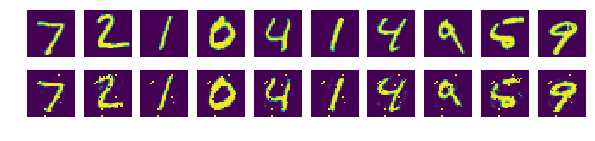

In [22]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28))) # 원본
    ax[1][i].imshow(np.reshape(samples[i], (28, 28))) # 신경망이 생성한 이미지

plt.show()